# Proposed Subject

In [1]:
# !pip install torchinfo
import torch
import torch.nn as nn
from torchinfo import summary
import matplotlib.pyplot as plt
import os
import gc
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
import time
import TrainerVTS_V08F as TP
import DataSetting_v5 as DS

In [2]:
date = '20240919'
name = f'{date}_Prop_sub'
data_path = ['../dataset/Door_EXP/A208',
#             '../dataset/Door_EXP/A308',
#             '../dataset/Door_EXP/B211',
#             '../dataset/Door_EXP/C605'
            ]
level = 'subject'

data_organizer = DS.DataOrganizer(name, data_path, level)
data_organizer.load()

Cross validation plan at subject level
Loading ../dataset/Door_EXP/A208...

Loaded 0709A23-csi.npy of shape (111248, 30, 3)
Loaded 0709A41-csi.npy of shape (248817, 30, 3)
Loaded 0709A24-csi.npy of shape (38347, 30, 3)
Loaded 0709A20-csi.npy of shape (209993, 30, 3)
Loaded 0709A14-csi.npy of shape (168611, 30, 3)
Loaded 0709A12-csi.npy of shape (151822, 30, 3)
Loaded 0709A02-csi.npy of shape (232687, 30, 3)
Loaded 0709A11-csi.npy of shape (219643, 30, 3)
Loaded 0709A50-csi.npy of shape (133412, 30, 3)
Loaded 0709A511-csi.npy of shape (62914, 30, 3)
Loaded 20240709_153519-rimg.npy of shape (4057, 128, 226)
Loaded 20240709_154950-rimg.npy of shape (6302, 128, 226)
Loaded 20240709_161802-rimg.npy of shape (3442, 128, 226)
Loaded 20240709_185105-rimg.npy of shape (6481, 128, 226)
Loaded 20240709_192745-rimg.npy of shape (7787, 128, 226)
Loaded 20240709_193501-rimg.npy of shape (3267, 128, 226)
Loaded 20240709_191754-rimg.npy of shape (5395, 128, 226)
Loaded 20240709_163045-rimg.npy of shap

In [3]:
print(data_organizer.total_segment_labels)

        env subject              bag       csi  group  segment      timestamp  \
0      A208    wang  20240709_164411   0709A30    0.0      0.0  1720511055239   
1      A208    wang  20240709_164411   0709A30    0.0      0.0  1720511055305   
2      A208    wang  20240709_164411   0709A30    0.0      0.0  1720511055372   
3      A208    wang  20240709_164411   0709A30    0.0      0.0  1720511055439   
4      A208    wang  20240709_164411   0709A30    0.0      0.0  1720511055506   
...     ...     ...              ...       ...    ...      ...            ...   
57978  A208    jiao  20240709_193644  0709A541    7.0     19.0  1720521469453   
57979  A208    jiao  20240709_193644  0709A541    7.0     19.0  1720521469487   
57980  A208    jiao  20240709_193644  0709A541    7.0     19.0  1720521469520   
57981  A208    jiao  20240709_193644  0709A541    7.0     19.0  1720521469553   
57982  A208    jiao  20240709_193644  0709A541    7.0     19.0  1720521469587   

      img_inds csi_inds  Un

### Teacher

In [4]:
preprocess = DS.Preprocess(new_size=(128, 128))
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2.pkl')

def run_t():
    for i in range(6):
        data_organizer.gen_plan(subset_ratio=0.2)
        train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='t')
        if current_test == 'higashinaka':
            continue
        T_trainer = TP.TeacherTrainer(beta=0.5,
                                  name='Teacher',
                                  loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                  lr=1e-4, epochs=10, cuda=gpu,
                                      preprocess = preprocess,
                                  train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                                  notion=f'{name}_{current_test}')

        T_trained = T_trainer.schedule(lr_decay=True)
        del T_trainer
        del T_trained
        torch.cuda.empty_cache()
        gc.collect()

Loaded plan!


Generating loaders for t: level = subject, current test = higashinaka
 Train dataset length = 9569
 Test dataset length = 2027
 Exported train loader of len 119, batch size = 64
 Exported valid loader of len 29, batch size = 64
 Exported test loader of len 2027, batch size = 1

==========20240919_Sub_Prop_higashinaka Teacher Training starting==========


  0%|          | 0/999 [00:00<?, ?it/s]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 432x288 with 0 Axes>

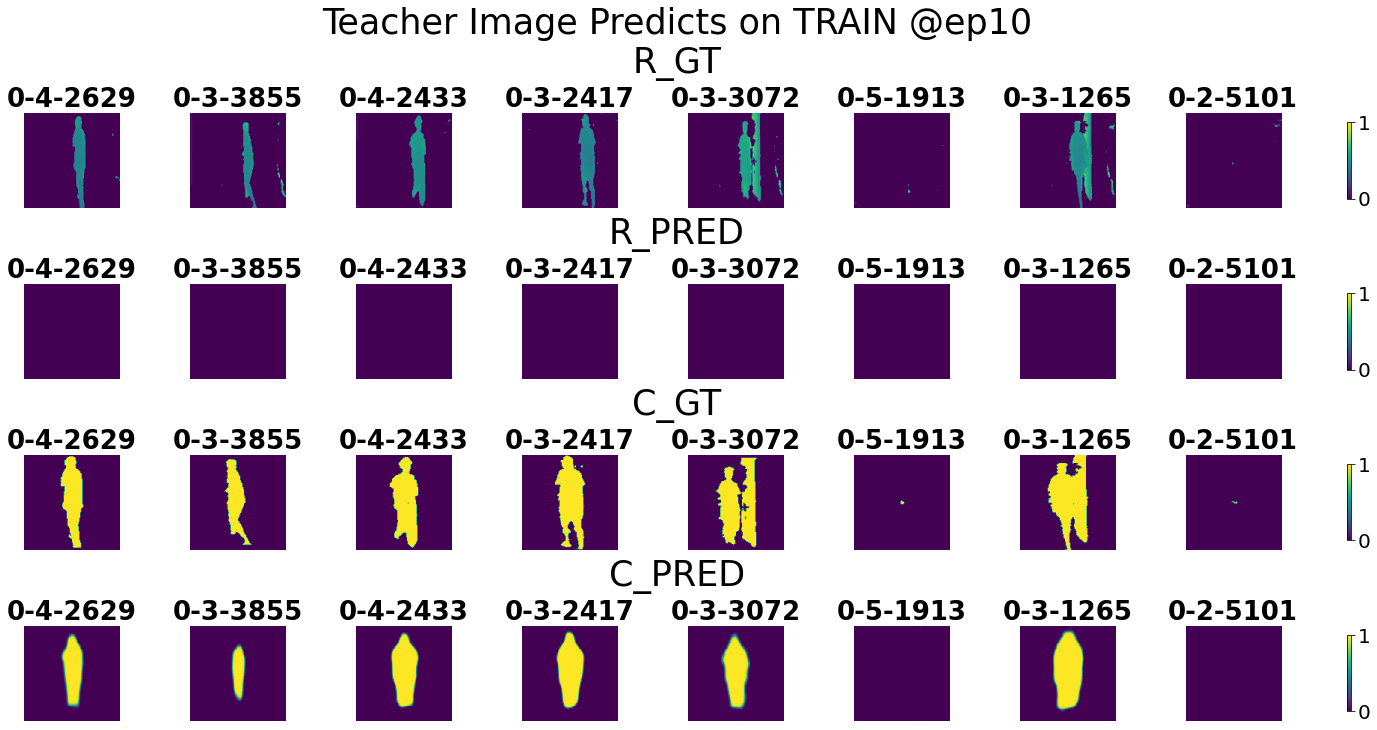

<Figure size 1440x720 with 0 Axes>

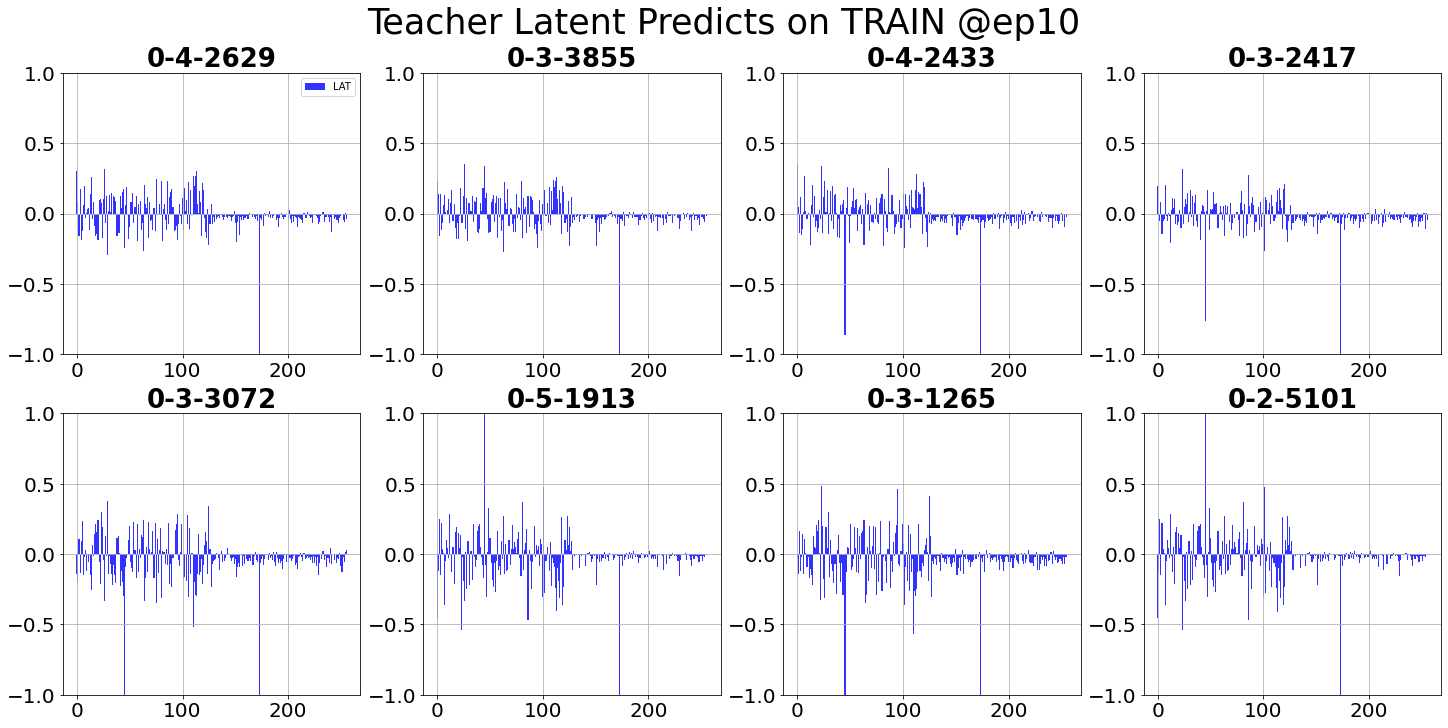

<Figure size 1440x720 with 0 Axes>

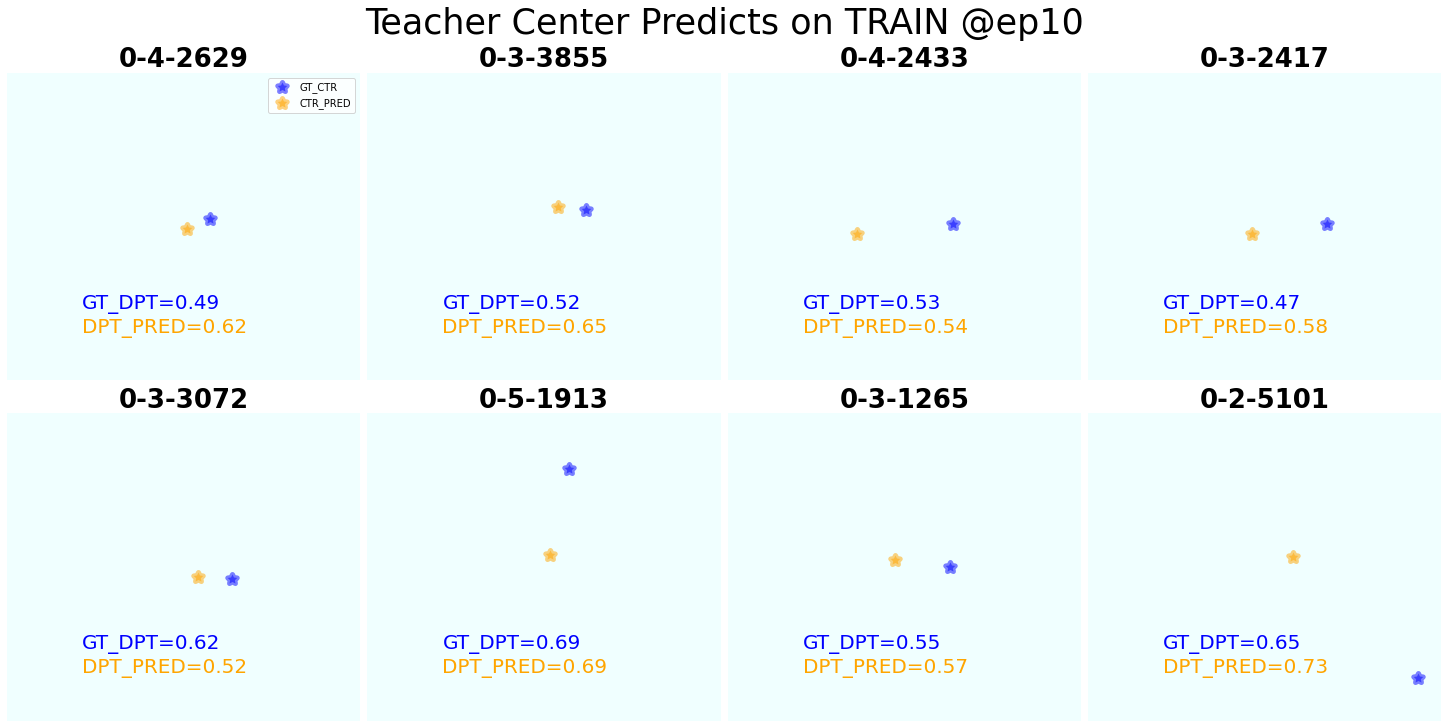

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

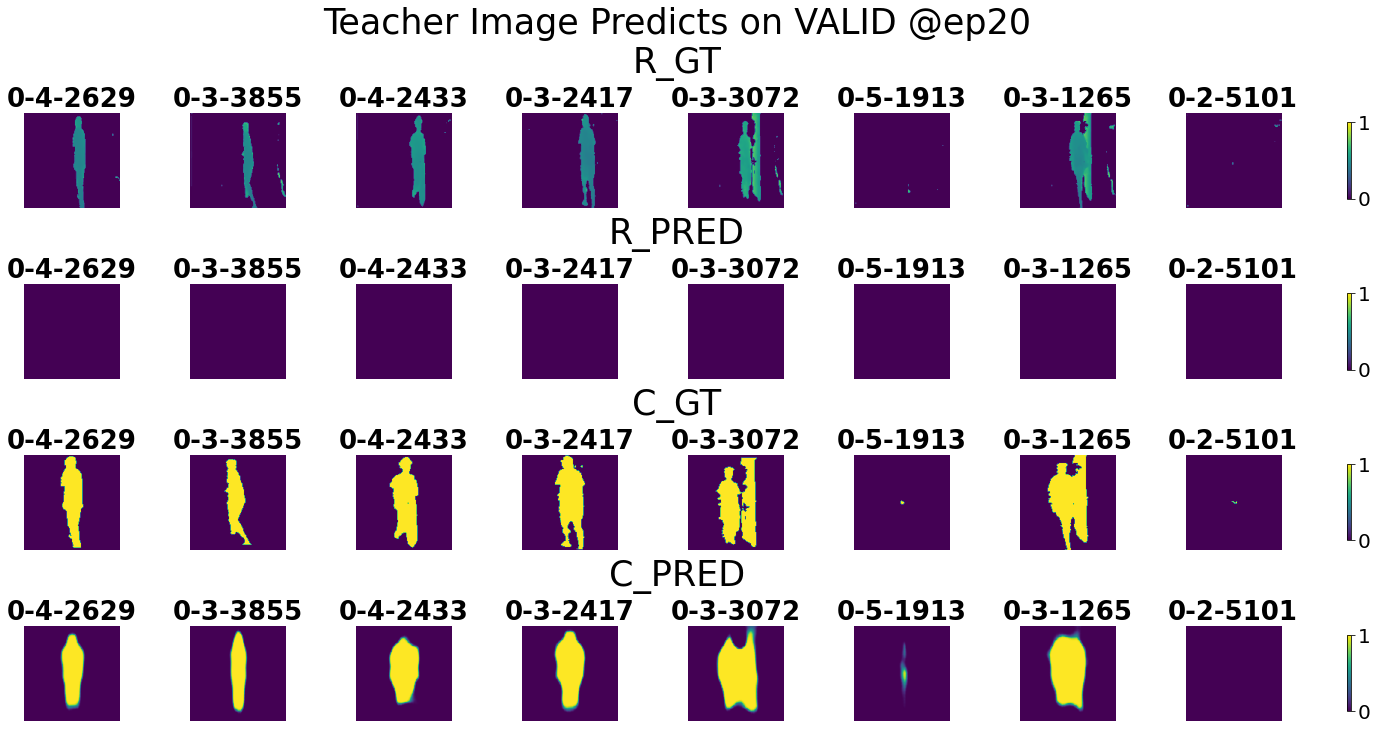

<Figure size 1440x720 with 0 Axes>

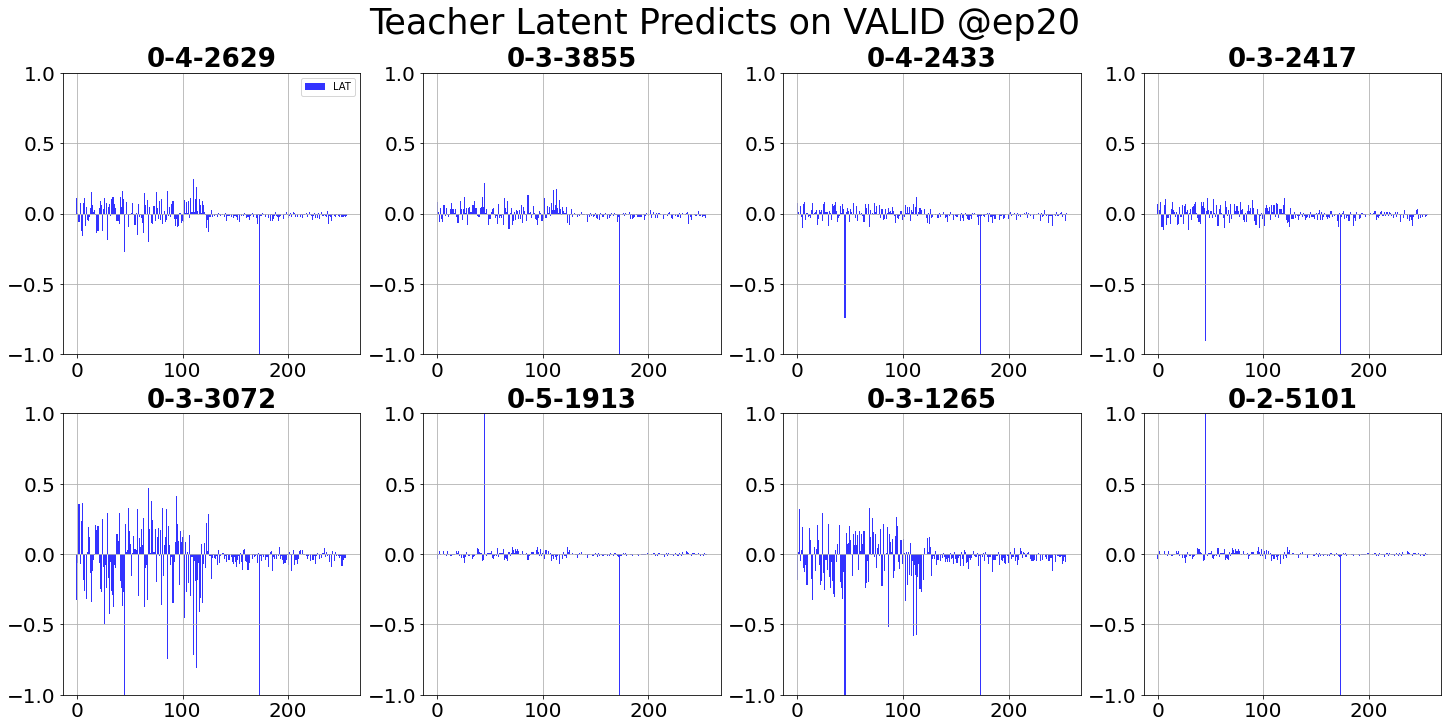

<Figure size 1440x720 with 0 Axes>

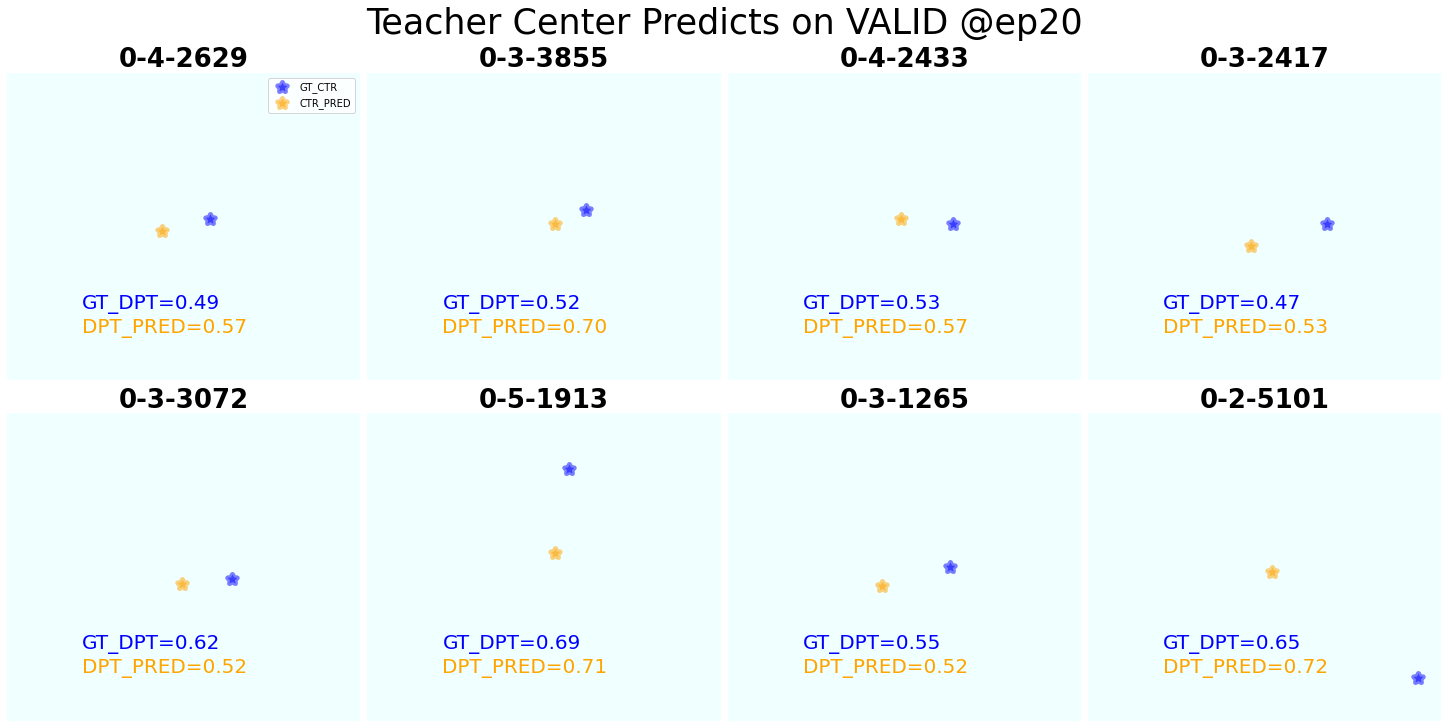

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

<Figure size 1440x720 with 0 Axes>

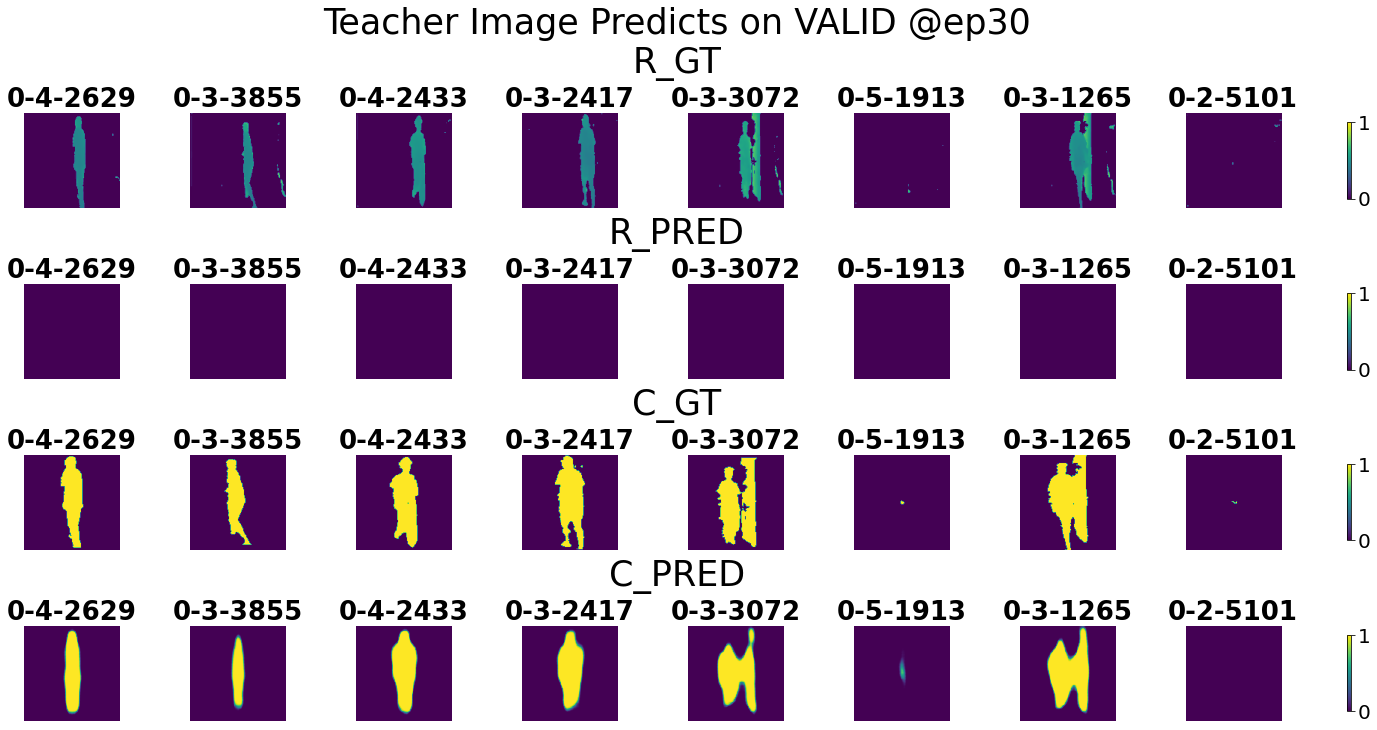

<Figure size 1440x720 with 0 Axes>

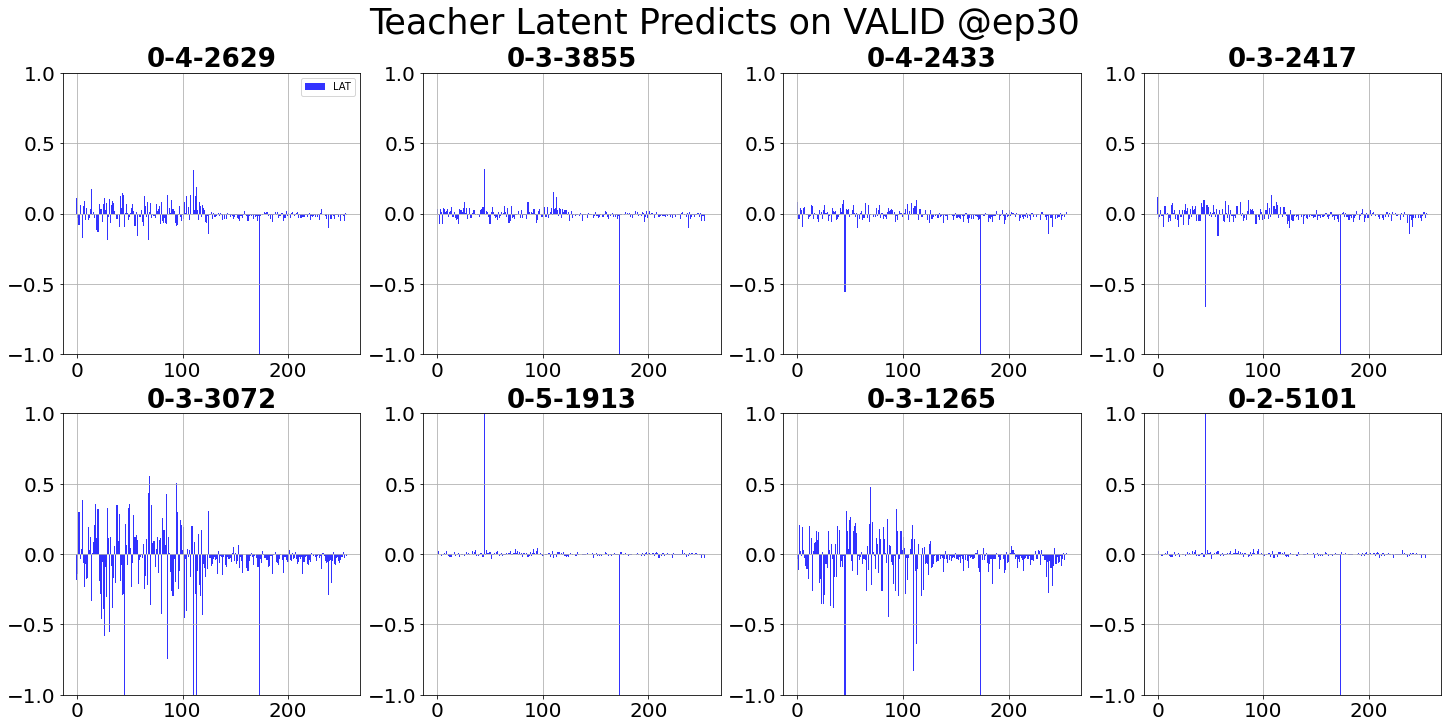

<Figure size 1440x720 with 0 Axes>

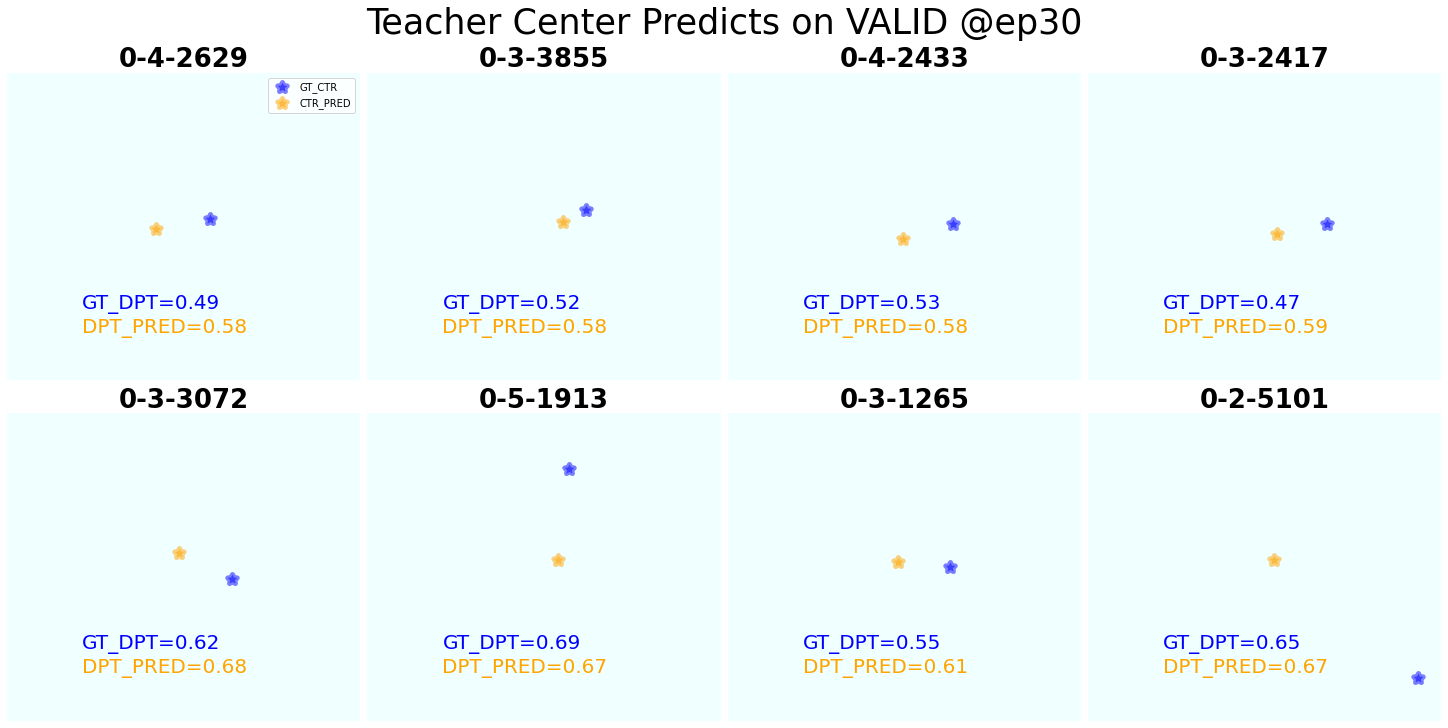

  0%|          |[00:00<?]

  0%|          |[00:00<?]

  0%|          |[00:00<?]

In [ ]:
gpu = 5
torch.cuda.set_device(gpu)
run_t()

### Student

In [4]:
preprocess = DS.Preprocess(new_size=(128, 128))
data_organizer.load_plan('../dataset/Door_EXP/subject_r0.2.pkl')

def run_s():
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')

    S_trainer = TP.StudentTrainer(name='Student',
                                  lstm_steps = 75,
                                  beta=0.5,
                                  loss_optimizer = {'LOSS': [torch.optim.Adam, 1e-4]},
                                  lr=1e-4, epochs=10, cuda=gpu,
                                  preprocess = preprocess,
                                  notion=f'{name}_{current_test}',
                                  train_loader=train_loader, valid_loader=valid_loader, test_loader=test_loader,
                                 )
    S_trainer.models['imgen'].load_state_dict(torch.load(f"../saved/20240919_Sub_Prop_higashinaka/Teacher_imgen_best.pth"))
    S_trainer.models['cimgde'].load_state_dict(torch.load(f"../saved/20240919_Sub_Prop_higashinaka/Teacher_cimgde_best.pth"))
    S_trainer.models['rimgde'].load_state_dict(torch.load(f"../saved/20240919_Sub_Prop_higashinaka/Teacher_rimgde_best.pth"))
    S_trainer.models['ctrde'].load_state_dict(torch.load(f"../saved/20240919_Sub_Prop_higashinaka/Teacher_ctrde_best.pth"))
    S_trained = S_trainer.schedule(lr_decay=True, train_module={'csien'}, eval_module={'imgen', 'cimgde', 'rimgde', 'ctrde'})

Loaded plan!


In [5]:
gpu = 5
torch.cuda.set_device(gpu)
run_s()

Generating loaders for s: level = subject, current test = None


TypeError: 'NoneType' object is not subscriptable

In [ ]:
for i in range(6):
    train_loader, valid_loader, test_loader, current_test = data_organizer.gen_loaders(mode='s')
    print(current_test)